In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traindata = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
testdata = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [ ]:
data = pd.concat([traindata, testdata],axis=0)

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/UNSW_NB15.csv')

In [ ]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [ ]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [ ]:
data['service'].replace('-',np.nan,inplace=True)

In [ ]:
data.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [ ]:
data.shape

(257673, 45)

In [ ]:
data['service'] = data['service'].fillna('others')

In [ ]:

data.dropna(inplace=True)

In [ ]:
data.shape

(257673, 45)

In [ ]:
data['attack_cat'].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [ ]:
data['state'].value_counts()

FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
CLO         1
PAR         1
URN         1
no          1
Name: state, dtype: int64

In [ ]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,others,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,others,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,others,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,others,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,others,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,others,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_features.csv')

In [ ]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
features['Type '].head()

0    nominal
1    integer
2    nominal
3    integer
4    nominal
Name: Type , dtype: object

In [ ]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
print(nominal_names)
print(integer_names)


0          srcip
2          dstip
4          proto
5          state
13       service
47    attack_cat
Name: Name, dtype: object
1                sport
3               dsport
7               sbytes
8               dbytes
9                 sttl
10                dttl
11               sloss
12               dloss
16               Spkts
17               Dpkts
18                swin
19                dwin
20               stcpb
21               dtcpb
22             smeansz
23             dmeansz
24         trans_depth
25         res_bdy_len
36        ct_state_ttl
37    ct_flw_http_mthd
39          ct_ftp_cmd
40          ct_srv_src
41          ct_srv_dst
42          ct_dst_ltm
43         ct_src_ ltm
44    ct_src_dport_ltm
45    ct_dst_sport_ltm
46      ct_dst_src_ltm
Name: Name, dtype: object


In [ ]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [ ]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,others,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,others,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,others,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,others,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,others,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,others,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
data = data.drop(['id'],axis=1)

**Data Visualization**

 **Binary Classification**

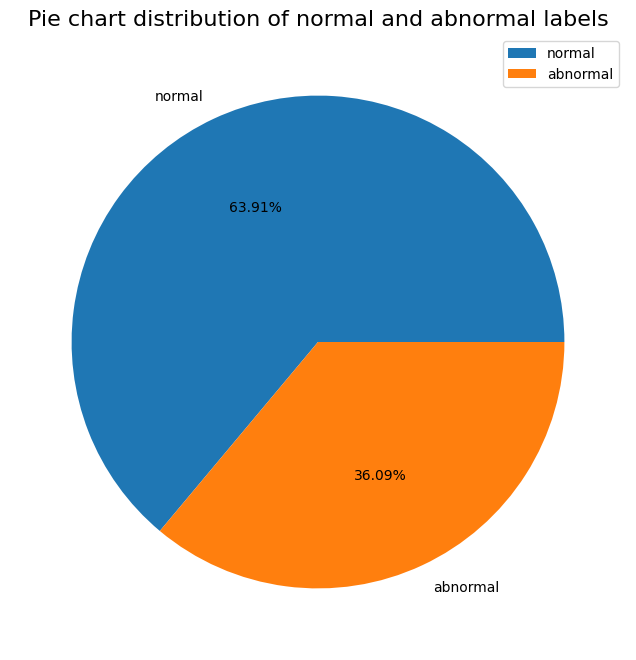

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
#plt.savefig('plots/Pie_chart_binary.png')
plt.show()

**One hot encoding**

In [ ]:
df_ = data[['proto','state','service']]

In [ ]:
data = data.drop(['proto','state','service'],axis=1)

In [ ]:
data.shape

(257673, 41)

In [ ]:
#encoding the string types using labelencoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_ = df_.apply(LabelEncoder().fit_transform)


In [ ]:
data_ = pd.concat([data,df_],axis=1)

In [ ]:
data_.shape

(257673, 44)

In [ ]:
data_ = data_.drop(['attack_cat'],axis=1)

In [ ]:
X = data_.drop(['label'],axis=1)
y = data_['label']

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for minority classes
smote = SMOTE(sampling_strategy="not majority")
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
df__ = pd.concat([X_balanced, y_balanced], axis=1)

In [ ]:
df__.shape

(329346, 43)

In [ ]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df__.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(df__,0.9)
print(len(set(corr_features)))
print(corr_features)

8
{'dloss', 'ct_src_dport_ltm', 'ct_srv_dst', 'dwin', 'dbytes', 'ct_ftp_cmd', 'sbytes', 'sloss'}


In [ ]:
df = df__.drop(['ct_srv_dst', 'ct_src_dport_ltm', 'dwin', 'dbytes', 'sbytes', 'dloss', 'ct_ftp_cmd', 'sloss'],axis=1)

In [ ]:
df.shape

(329346, 35)

In [ ]:
X_balanced = df.drop(['label'],axis=1)
y_balanced = df['label']

In [ ]:
from sklearn.preprocessing import LabelEncoder as le

y_balanced= le().fit_transform(y_balanced)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_balanced,y_balanced,test_size=0.3, random_state=50)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train_re = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test_re = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_train_re.shape

(230542, 34, 1)

In [ ]:
X_train_re_re = np.reshape(np.array(X_train), (X_train.shape[0],1, X_train.shape[1]))
X_test_re_re = np.reshape(np.array(X_test), (X_test.shape[0],1, X_test.shape[1]))

In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

In [ ]:
model = Sequential()
model.add(LSTM(256,input_dim=34, return_sequences=True, activation = 'relu'))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences=True, activation = 'relu'))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(2))
model.add(Activation('sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_re_re, y_train, validation_split=0.15, epochs = 50, batch_size = 256, verbose=2)


Epoch 1/50
766/766 - 36s - loss: 0.2231 - accuracy: 0.8914 - val_loss: 0.1638 - val_accuracy: 0.9145 - 36s/epoch - 47ms/step
Epoch 2/50
766/766 - 31s - loss: 0.1577 - accuracy: 0.9207 - val_loss: 0.1521 - val_accuracy: 0.9220 - 31s/epoch - 41ms/step
Epoch 3/50
766/766 - 31s - loss: 0.1478 - accuracy: 0.9269 - val_loss: 0.1467 - val_accuracy: 0.9274 - 31s/epoch - 40ms/step
Epoch 4/50
766/766 - 30s - loss: 0.1425 - accuracy: 0.9304 - val_loss: 0.1424 - val_accuracy: 0.9291 - 30s/epoch - 39ms/step
Epoch 5/50
766/766 - 30s - loss: 0.1395 - accuracy: 0.9322 - val_loss: 0.1389 - val_accuracy: 0.9340 - 30s/epoch - 40ms/step
Epoch 6/50
766/766 - 29s - loss: 0.1371 - accuracy: 0.9331 - val_loss: 0.1359 - val_accuracy: 0.9352 - 29s/epoch - 38ms/step
Epoch 7/50
766/766 - 29s - loss: 0.1349 - accuracy: 0.9346 - val_loss: 0.1348 - val_accuracy: 0.9348 - 29s/epoch - 38ms/step
Epoch 8/50
766/766 - 31s - loss: 0.1335 - accuracy: 0.9359 - val_loss: 0.1318 - val_accuracy: 0.9379 - 31s/epoch - 41ms/step


In [ ]:
loss, accuracy = model.evaluate(X_test_re_re, y_test)

3088/3088 [==============================] - 19s 6ms/step - loss: 0.1303 - accuracy: 0.9411


In [ ]:
y_pred = model.predict(X_test_re_re)

3088/3088 [==============================] - 17s 6ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

Accuracy:  0.9410955022063884
Precision: 0.9414
Recall: 0.9411
F1 Score: 0.9411


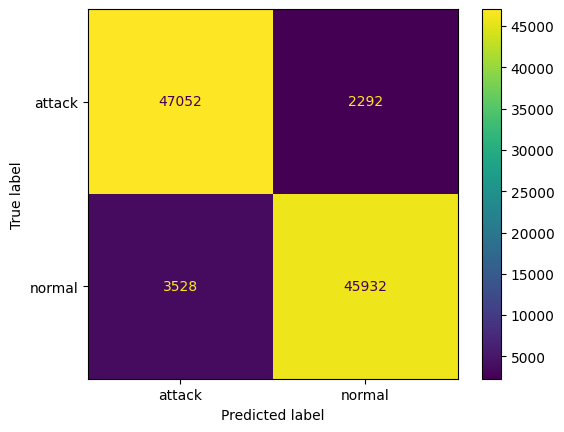

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['attack','normal'])
cm_display.plot()
plt.show()


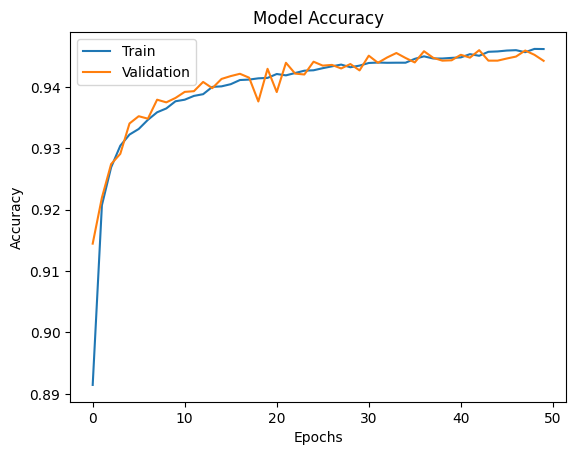

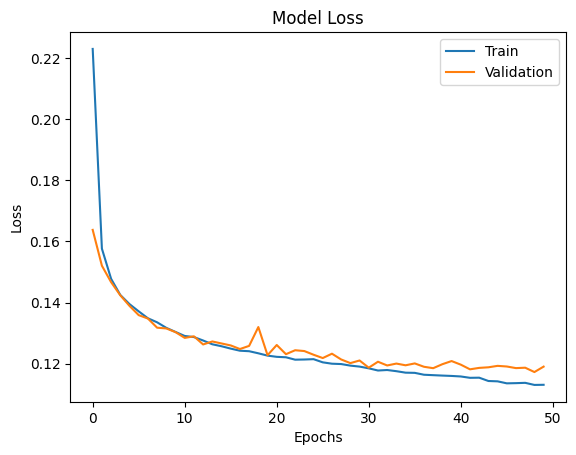

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**CNN**

In [ ]:
cnn = Sequential()
cnn.add(Convolution1D(256, 3,activation="relu",input_shape=(34, 1)))
cnn.add(MaxPooling1D(2))
cnn.add(Convolution1D(128,3, activation="relu"))
cnn.add(MaxPooling1D(2))
#cnn.add(Convolution1D(64, 3, activation="relu"))
#cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation="sigmoid"))

In [ ]:
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train_re, y_train, validation_split=0.15, epochs = 50, batch_size = 256, verbose=2)

Epoch 1/50
766/766 - 83s - loss: 0.1549 - accuracy: 0.9267 - val_loss: 0.1412 - val_accuracy: 0.9310 - 83s/epoch - 108ms/step
Epoch 2/50
766/766 - 86s - loss: 0.1419 - accuracy: 0.9330 - val_loss: 0.1381 - val_accuracy: 0.9352 - 86s/epoch - 113ms/step
Epoch 3/50
766/766 - 78s - loss: 0.1372 - accuracy: 0.9354 - val_loss: 0.1329 - val_accuracy: 0.9372 - 78s/epoch - 102ms/step
Epoch 4/50
766/766 - 80s - loss: 0.1340 - accuracy: 0.9370 - val_loss: 0.1310 - val_accuracy: 0.9390 - 80s/epoch - 104ms/step
Epoch 5/50
766/766 - 81s - loss: 0.1317 - accuracy: 0.9381 - val_loss: 0.1281 - val_accuracy: 0.9399 - 81s/epoch - 105ms/step
Epoch 6/50
766/766 - 80s - loss: 0.1302 - accuracy: 0.9384 - val_loss: 0.1275 - val_accuracy: 0.9401 - 80s/epoch - 105ms/step
Epoch 7/50
766/766 - 81s - loss: 0.1295 - accuracy: 0.9391 - val_loss: 0.1270 - val_accuracy: 0.9407 - 81s/epoch - 105ms/step
Epoch 8/50
766/766 - 78s - loss: 0.1276 - accuracy: 0.9401 - val_loss: 0.1264 - val_accuracy: 0.9403 - 78s/epoch - 102

In [ ]:
loss, accuracy = cnn.evaluate(X_test_re, y_test)

3088/3088 [==============================] - 20s 6ms/step - loss: 0.1266 - accuracy: 0.9407


In [ ]:
y_pred = cnn.predict(X_test_re)

3088/3088 [==============================] - 20s 7ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

Accuracy:  0.940690660297154
Precision: 0.9411
Recall: 0.9407
F1 Score: 0.9407


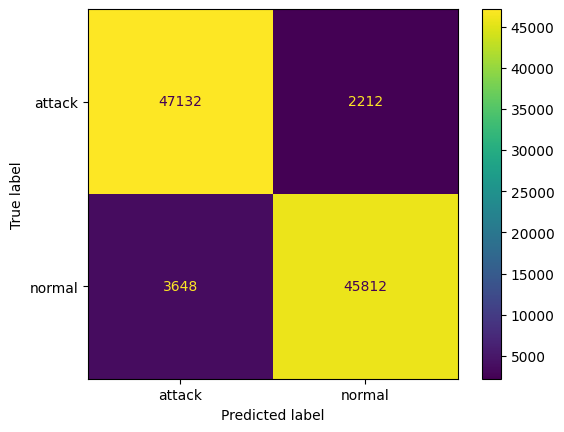

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['attack','normal'])
cm_display.plot()
plt.show()


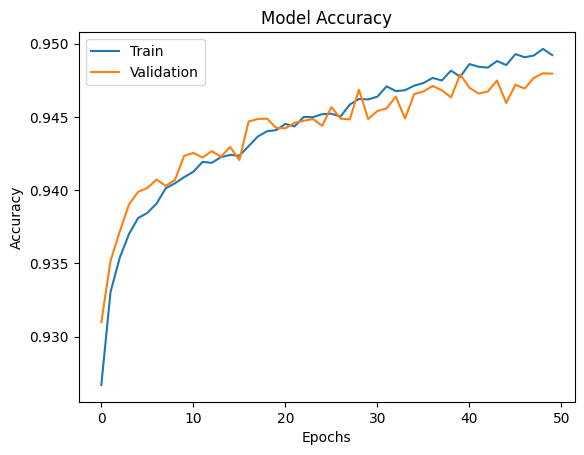

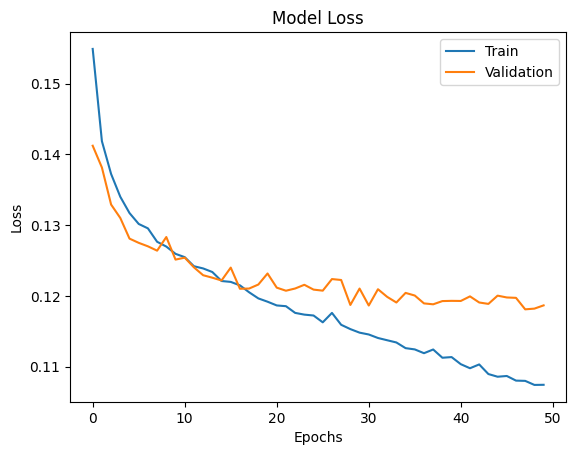

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

CNN-LSTM

In [ ]:

lstm_output_size = 70
cnnlstm = Sequential()
cnnlstm.add(Convolution1D(256, 3,activation="relu",input_shape=(34, 1)))
cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(Convolution1D(128, 3,activation="relu"))
cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(Dropout(0.4))
cnnlstm.add(LSTM(lstm_output_size))
cnnlstm.add(Dropout(0.4))
cnnlstm.add(Dense(128, activation="relu"))
cnnlstm.add(Dense(2, activation="sigmoid"))

In [ ]:
cnnlstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnnlstm.fit(X_train_re, y_train, validation_split=0.15, epochs = 20, batch_size = 256, verbose=2)

Epoch 1/20
766/766 - 95s - loss: 0.2275 - accuracy: 0.8917 - val_loss: 0.1620 - val_accuracy: 0.9236 - 95s/epoch - 124ms/step
Epoch 2/20
766/766 - 87s - loss: 0.1624 - accuracy: 0.9230 - val_loss: 0.1453 - val_accuracy: 0.9306 - 87s/epoch - 114ms/step
Epoch 3/20
766/766 - 89s - loss: 0.1518 - accuracy: 0.9272 - val_loss: 0.1423 - val_accuracy: 0.9330 - 89s/epoch - 116ms/step
Epoch 4/20
766/766 - 87s - loss: 0.1464 - accuracy: 0.9298 - val_loss: 0.1404 - val_accuracy: 0.9311 - 87s/epoch - 114ms/step
Epoch 5/20
766/766 - 88s - loss: 0.1436 - accuracy: 0.9313 - val_loss: 0.1358 - val_accuracy: 0.9368 - 88s/epoch - 115ms/step
Epoch 6/20
766/766 - 87s - loss: 0.1402 - accuracy: 0.9331 - val_loss: 0.1354 - val_accuracy: 0.9359 - 87s/epoch - 114ms/step
Epoch 7/20
766/766 - 87s - loss: 0.1386 - accuracy: 0.9345 - val_loss: 0.1347 - val_accuracy: 0.9359 - 87s/epoch - 113ms/step
Epoch 8/20
766/766 - 90s - loss: 0.1362 - accuracy: 0.9361 - val_loss: 0.1319 - val_accuracy: 0.9403 - 90s/epoch - 117

In [ ]:
loss, accuracy = cnnlstm.evaluate(X_test_re, y_test)

3088/3088 [==============================] - 27s 9ms/step - loss: 0.1286 - accuracy: 0.9403


In [ ]:
y_pred = cnnlstm.predict(X_test_re)

3088/3088 [==============================] - 26s 8ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

Accuracy:  0.9403060604833813
Precision: 0.9404
Recall: 0.9403
F1 Score: 0.9403


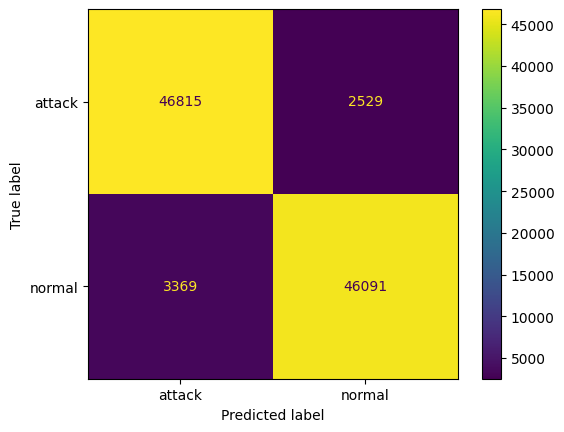

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['attack','normal'])
cm_display.plot()
plt.show()


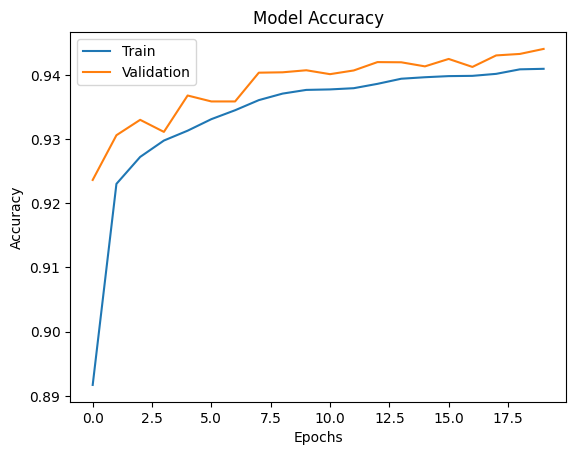

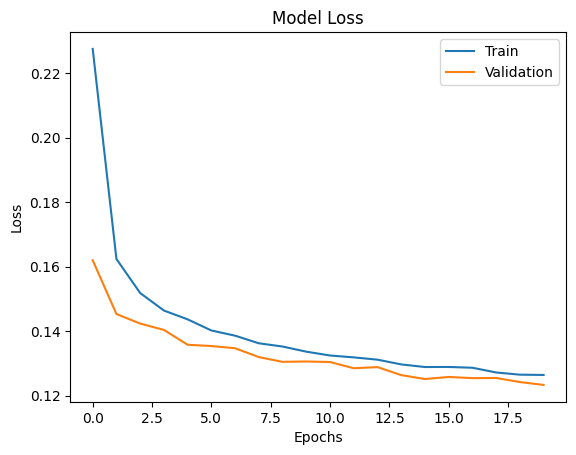

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
gru = Sequential()
gru.add(GRU(256,input_dim=34, activation = 'relu',return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(256,activation = 'relu', return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(256, activation = 'relu',return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(256, activation = 'relu',return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(256, activation = 'relu',return_sequences=False))
gru.add(Dropout(0.1))
gru.add(Dense(2))
gru.add(Activation('sigmoid'))

In [ ]:
gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = gru.fit(X_train_re_re, y_train, validation_split=0.15, epochs = 50, batch_size = 256, verbose=2)


Epoch 1/50
766/766 - 77s - loss: 0.1182 - accuracy: 0.9440 - val_loss: 0.1223 - val_accuracy: 0.9447 - 77s/epoch - 101ms/step
Epoch 2/50
766/766 - 71s - loss: 0.1180 - accuracy: 0.9435 - val_loss: 0.1250 - val_accuracy: 0.9406 - 71s/epoch - 93ms/step
Epoch 3/50
766/766 - 69s - loss: 0.1170 - accuracy: 0.9445 - val_loss: 0.1214 - val_accuracy: 0.9451 - 69s/epoch - 90ms/step
Epoch 4/50
766/766 - 69s - loss: 0.1168 - accuracy: 0.9445 - val_loss: 0.1217 - val_accuracy: 0.9437 - 69s/epoch - 90ms/step
Epoch 5/50
766/766 - 71s - loss: 0.1166 - accuracy: 0.9443 - val_loss: 0.1215 - val_accuracy: 0.9449 - 71s/epoch - 93ms/step
Epoch 6/50
766/766 - 71s - loss: 0.1160 - accuracy: 0.9446 - val_loss: 0.1222 - val_accuracy: 0.9437 - 71s/epoch - 93ms/step
Epoch 7/50
766/766 - 69s - loss: 0.1156 - accuracy: 0.9451 - val_loss: 0.1226 - val_accuracy: 0.9445 - 69s/epoch - 90ms/step
Epoch 8/50
766/766 - 72s - loss: 0.1150 - accuracy: 0.9454 - val_loss: 0.1209 - val_accuracy: 0.9453 - 72s/epoch - 93ms/step

In [ ]:
loss, accuracy = gru.evaluate(X_test_re_re, y_test)
y_pred = gru.predict(X_test_re_re)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

3088/3088 [==============================] - 24s 8ms/step


Accuracy:  0.9441014533824541
Precision: 0.9446
Recall: 0.9441
F1 Score: 0.9441


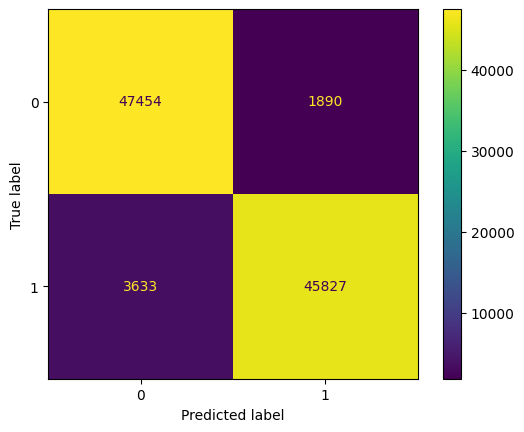

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


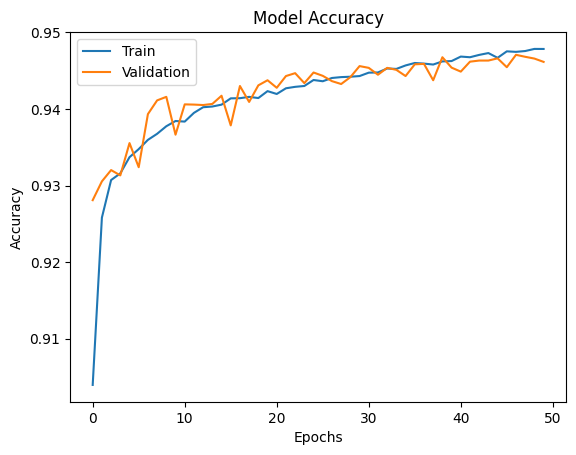

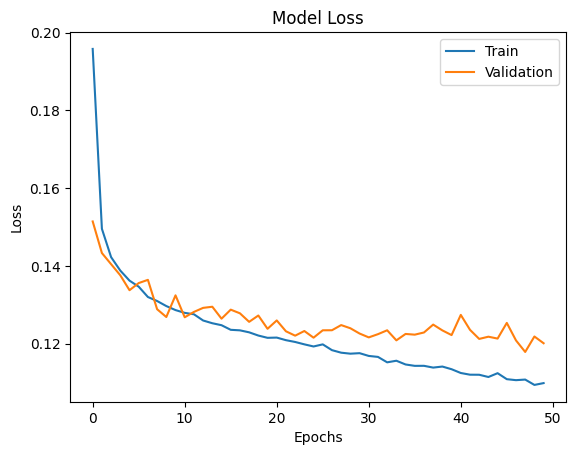

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()